In [1]:
from scipy.stats import norm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/dashabalashova/python_projects/1_1_5_ML_Bioinf/data/noisysine.csv')
df_tr, df_val = train_test_split(df, test_size=0.2)


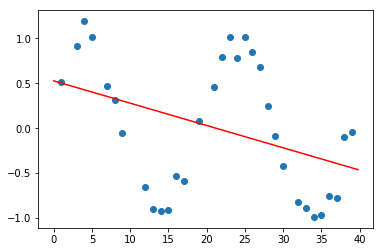

n = 1 , alpha = 0.01
R^2 = 0.32828821147524667


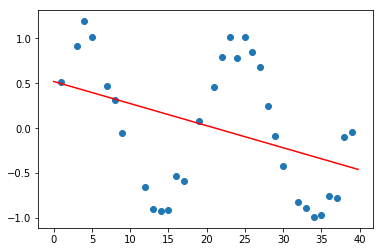

n = 1 , alpha = 0.1
R^2 = 0.3282125045347223


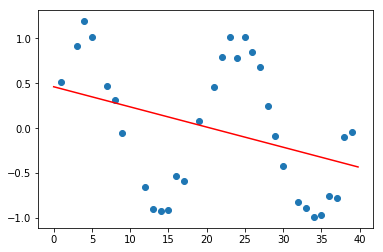

n = 1 , alpha = 1
R^2 = 0.3237468967492032


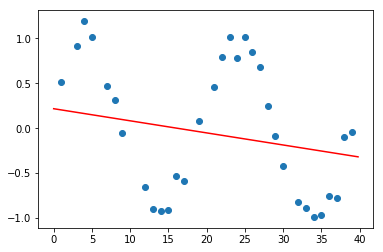

n = 1 , alpha = 10
R^2 = 0.23160502504632197


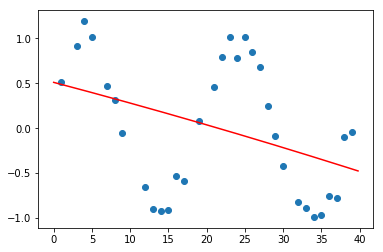

n = 2 , alpha = 0.01
R^2 = 0.3212240536268247


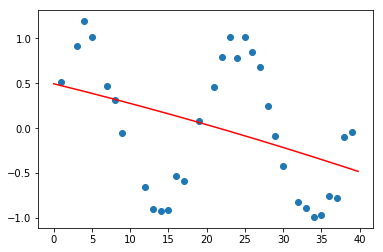

n = 2 , alpha = 0.1
R^2 = 0.31706827685268835


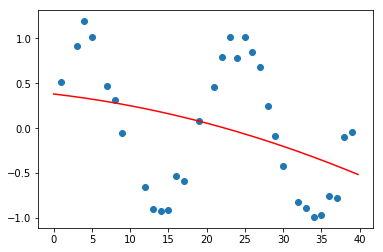

n = 2 , alpha = 1
R^2 = 0.27752191308731555


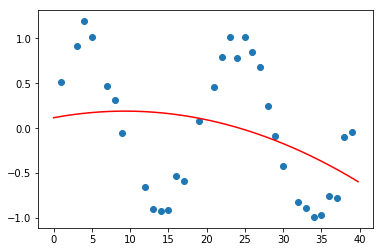

n = 2 , alpha = 10
R^2 = 0.12851460456994157


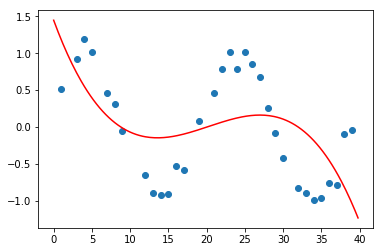

n = 3 , alpha = 0.01
R^2 = 0.1702002770471307


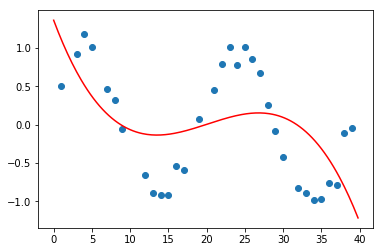

n = 3 , alpha = 0.1
R^2 = 0.21019962408724946


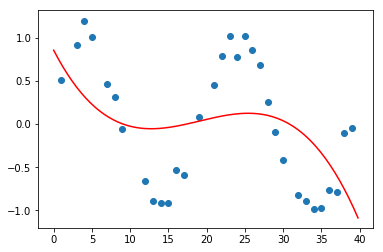

n = 3 , alpha = 1
R^2 = 0.31397910057057243


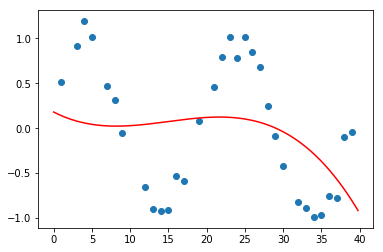

n = 3 , alpha = 10
R^2 = 0.10035250227479087


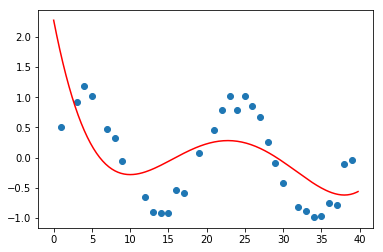

n = 4 , alpha = 0.01
R^2 = -0.5569089462062684


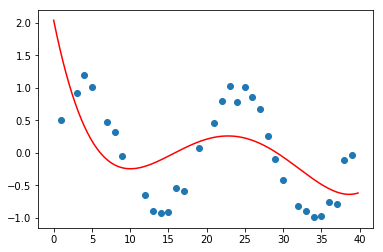

n = 4 , alpha = 0.1
R^2 = -0.3128332555819049


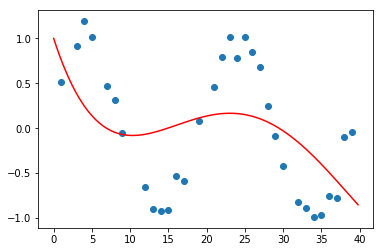

n = 4 , alpha = 1
R^2 = 0.25764215158046655


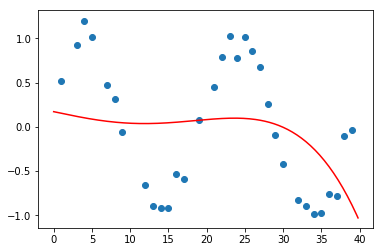

n = 4 , alpha = 10
R^2 = 0.12562691603180698


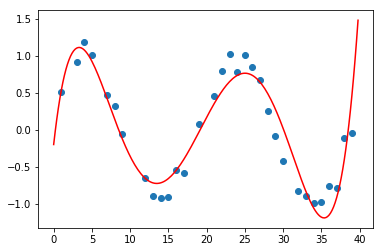

n = 5 , alpha = 0.01
R^2 = 0.792483756384825


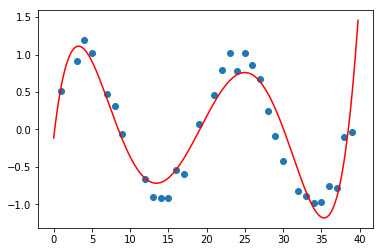

n = 5 , alpha = 0.1
R^2 = 0.8154191915006996


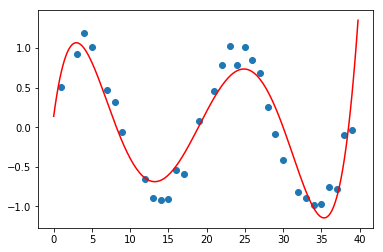

n = 5 , alpha = 1
R^2 = 0.8434324742741992


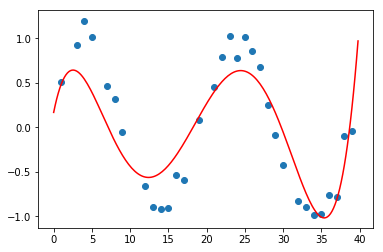

n = 5 , alpha = 10
R^2 = 0.639975530610226


In [30]:
def LR(df, n, a):
    df = df.reset_index(drop=True)
    X = pd.concat([pd.DataFrame([1]*df.shape[0]), df.x], axis=1)
    
    
    plt.scatter(df.x, df.y)
    t = np.arange(0., 40., 0.2)
    for m in range(2, n+1):
        X['poly_'+str(m)] = X.apply(lambda s: s.x**m, axis = 1)
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(),X)+a*np.identity(n+1)), X.transpose()), df.y.values)
    y_pl = w[0]+w[1]*t
    for m in range(2, n+1):
        y_pl += w[m]*t**m
    return w
 
    
def impl(df, w):
    df = df.reset_index(drop=True)
    X = pd.concat([pd.DataFrame(np.ones(df.shape[0])), df.x], axis = 1)
    n = len(w)-1
    t = np.arange(0., 40., 0.2)
    y_pl = w[0]+w[1]*t
    y_pred = w[0]*pd.Series(np.ones(df.shape[0]))+w[1]*df.x
    for m in range(2, n+1):
        y_pl += w[m]*t**m
        y_pred += w[m]*df.x**m
    plt.plot(t, y_pl, 'r')
    plt.show()
    SS_res = sum((df.y-y_pred)**2)/df.shape[0]
    SS_tot = sum((df.y-np.mean(df.y))**2)/df.shape[0]
    print('n =', n, ', alpha =', a)
    print('R^2 =', 1-SS_res/SS_tot)

        
for n in range(1,6):
    for a in [0.01, 0.1, 1, 10]:
        w = LR(df_tr, n, a)
        impl(df_val, w)

In [38]:
df = pd.read_csv('/Users/dashabalashova/python_projects/1_1_5_ML_Bioinf/data/hydrodynamics.csv')
df_tr, df_val = train_test_split(df, test_size=0.2)

df.head()

def LR2(df, n, a):
    df = df.reset_index(drop=True)
    X = pd.concat([pd.DataFrame([1]*df.shape[0]), df.drop(columns=['y'])], axis=1)
    if n==2:
        for n1 in range(0,6):
            for n2 in range(n1,6):
                c1 = df.columns[n1]
                c2 = df.columns[n2]
                X[c1+'*'+c2]=X.apply(lambda s: s[c1]*s[c2], axis=1)
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(),X)+a*np.identity(X.shape[1])), X.transpose()), df.y.values)
    return w

def impl2(df, w, n):
    df = df.reset_index(drop=True)
    X = pd.concat([pd.DataFrame([1]*df.shape[0]), df.drop(columns=['y'])], axis=1)
    
    if n==2:
        for n1 in range(0,6):
            for n2 in range(n1,6):
                c1 = df.columns[n1]
                c2 = df.columns[n2]
                X[c1+'*'+c2]=X.apply(lambda s: s[c1]*s[c2], axis=1)
       
    y_pred = w[0]*pd.Series(np.ones(df.shape[0]))
    
    for m in range(1, len(w)):
        
        c1 = X.columns[m]
        
        y_pred += w[m]*X[c1]
    
    SS_res = sum((df.y-y_pred)**2)/df.shape[0]
    SS_tot = sum((df.y-np.mean(df.y))**2)/df.shape[0]
    print('n =', n, ', alpha =', a)
    print('R^2 =', 1-SS_res/SS_tot)
    print()

for n in range(1,3):
    for a in [0.00001, 0.001, 0.01, 0.1, 1, 10]:
        w = LR2(df_tr, n, a)
        impl2(df_val, w, n)

n = 1 , alpha = 1e-05
R^2 = 0.5293331164703816

n = 1 , alpha = 0.001
R^2 = 0.529685165438184

n = 1 , alpha = 0.01
R^2 = 0.5319753073612581

n = 1 , alpha = 0.1
R^2 = 0.5388577557177953

n = 1 , alpha = 1
R^2 = 0.5139724406912614

n = 1 , alpha = 10
R^2 = 0.16618219492848063

n = 2 , alpha = 1e-05
R^2 = 0.8865328075148117

n = 2 , alpha = 0.001
R^2 = 0.8874403943327919

n = 2 , alpha = 0.01
R^2 = 0.8258115556876857

n = 2 , alpha = 0.1
R^2 = 0.5895298299257385

n = 2 , alpha = 1
R^2 = 0.5115557184809217

n = 2 , alpha = 10
R^2 = 0.5408138304611589

